In [5]:
import pandas as pd

In [6]:
df_ethusd = pd.read_csv("Ethereum.csv") 
df_ethusd.head()

,Date,Close,Open,High,Low,Change
0,12/16/2021,3956.62,4019.57,4108.24,3955.46,decrease
1,12/15/2021,4019.24,3860.51,4090.15,3649.69,increase
2,12/14/2021,3861.55,3782.12,3879.43,3690.06,increase
3,12/13/2021,3781.94,4131.47,4141.27,3673.19,decrease
4,12/12/2021,4131.78,4078.17,4173.21,3988.29,increase


In [7]:
print(df_ethusd.shape)

(732, 6)


In [8]:
# # convert date format to datetime
# df_ethusd['Date'] = pd.to_datetime(df_ethusd['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
# df_ethusd['Date'] = pd.to_datetime(df_ethusd['Date'])

# # sort values by date
# df_ethusd = df_ethusd.sort_values(by='Date')
# df_ethusd.rename(columns = {'Date':'datetime'}, inplace = True)

In [9]:
# df_ethusd.head()

In [10]:
df_ethusd.dtypes

Date       object
Close     float64
Open      float64
High      float64
Low       float64
Change     object
dtype: object

In [11]:
df_ethusd.columns

Index(['Date', 'Close', 'Open', 'High', 'Low', 'Change'], dtype='object')

In [12]:
category = df_ethusd['Change'].to_list()

In [13]:
unique_category = list(set(category))
unique_category

['increase', 'decrease']

In [14]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df_ethusd['Change'] = label.fit_transform(df_ethusd.Change)


In [15]:
x = df_ethusd.drop('Change', axis = 'columns')
x = x.drop('Date', axis = 'columns')
y = df_ethusd['Change']

In [16]:
x.shape

(732, 4)

In [17]:
import numpy as np
y = np.array(y).reshape(len(y), 1)
y.shape

(732, 1)

In [18]:
from sklearn.model_selection import train_test_split

train, test, y, y_test = train_test_split(x,y, test_size=0.2, shuffle=True,random_state=1)

In [19]:
train.shape, y.shape

((585, 4), (585, 1))

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

#ANN

In [31]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes =(15,15,15), max_iter = 1000, activation= 'relu')

In [32]:
mlp.fit(train,y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(15, 15, 15), max_iter=1000)

In [33]:
from sklearn.metrics import confusion_matrix
result_ann = mlp.predict(test)
cm_ann = confusion_matrix(y_test, result_ann)

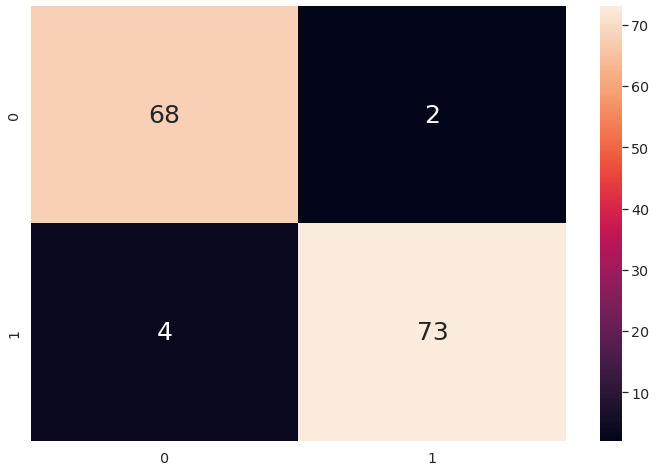

In [34]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm_ann, range(2), range(2))
plt.figure(figsize=(12,8))
sn.set(font_scale=1.3) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 25}, fmt='g') # for num predict size

plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,result_ann, target_names=unique_category, digits=4))

              precision    recall  f1-score   support

    decrease     0.9429    0.9429    0.9429        70
    increase     0.9481    0.9481    0.9481        77

    accuracy                         0.9456       147
   macro avg     0.9455    0.9455    0.9455       147
weighted avg     0.9456    0.9456    0.9456       147



#KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [41]:
knn.fit(train,y)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [42]:
from sklearn.metrics import confusion_matrix
result_knn = knn.predict(test)
cm_knn = confusion_matrix(y_test, result_knn)

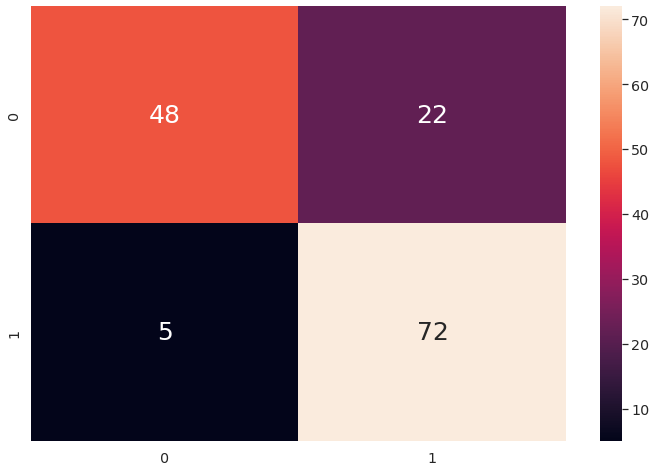

In [43]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm_knn, range(2), range(2))
plt.figure(figsize=(12,8))
sn.set(font_scale=1.3) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 25}, fmt='g') # for num predict size

plt.show()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,result_knn, target_names=unique_category, digits=4))

              precision    recall  f1-score   support

    increase     0.9057    0.6857    0.7805        70
    decrease     0.7660    0.9351    0.8421        77

    accuracy                         0.8163       147
   macro avg     0.8358    0.8104    0.8113       147
weighted avg     0.8325    0.8163    0.8128       147



#SVM

In [50]:
from sklearn import svm
svm = svm.SVC(kernel="sigmoid")

In [51]:
svm.fit(train,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

In [52]:
from sklearn.metrics import confusion_matrix
result_svm = svm.predict(test)
cm_svm = confusion_matrix(y_test, result_svm)

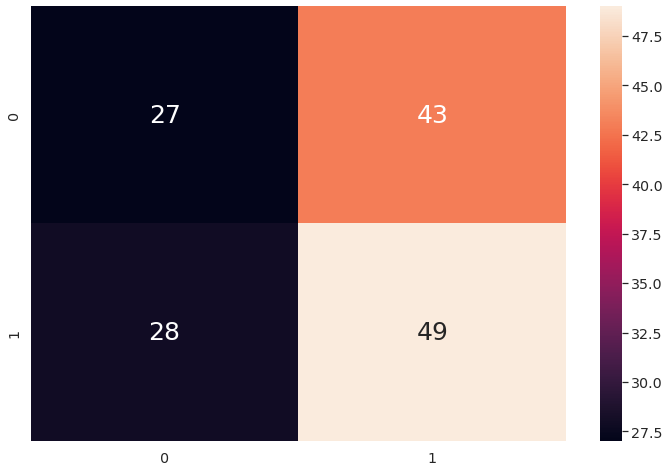

In [53]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm_svm, range(2), range(2))
plt.figure(figsize=(12,8))
sn.set(font_scale=1.3) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 25}, fmt='g') # for num predict size

plt.show()

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,result_svm, target_names=unique_category, digits=4))

              precision    recall  f1-score   support

    increase     0.4909    0.3857    0.4320        70
    decrease     0.5326    0.6364    0.5799        77

    accuracy                         0.5170       147
   macro avg     0.5118    0.5110    0.5059       147
weighted avg     0.5128    0.5170    0.5095       147



#Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [36]:
dtree.fit(train,y)

DecisionTreeClassifier()

In [37]:
from sklearn.metrics import confusion_matrix
result_tree = dtree.predict(test)
cm_tree = confusion_matrix(y_test, result_tree)

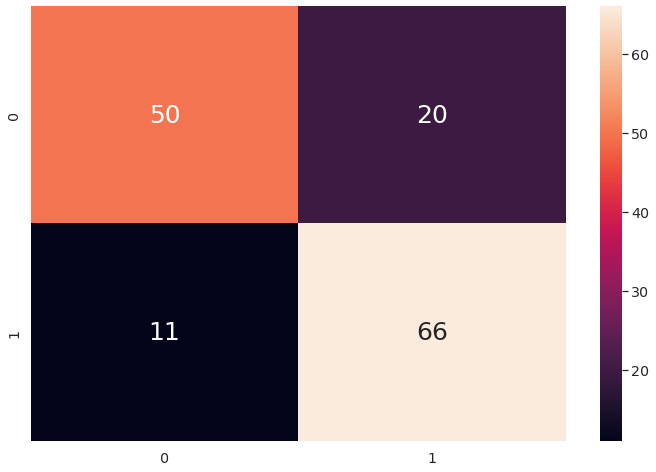

In [38]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm_tree, range(2), range(2))
plt.figure(figsize=(12,8))
sn.set(font_scale=1.3) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 25}, fmt='g') # for num predict size

plt.show()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,result_tree, target_names=unique_category, digits=4))

              precision    recall  f1-score   support

    increase     0.8197    0.7143    0.7634        70
    decrease     0.7674    0.8571    0.8098        77

    accuracy                         0.7891       147
   macro avg     0.7936    0.7857    0.7866       147
weighted avg     0.7923    0.7891    0.7877       147



#naive bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [46]:
gnb.fit(train,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [47]:
from sklearn.metrics import confusion_matrix
result_gnb = gnb.predict(test)
cm_gnb = confusion_matrix(y_test, result_gnb)

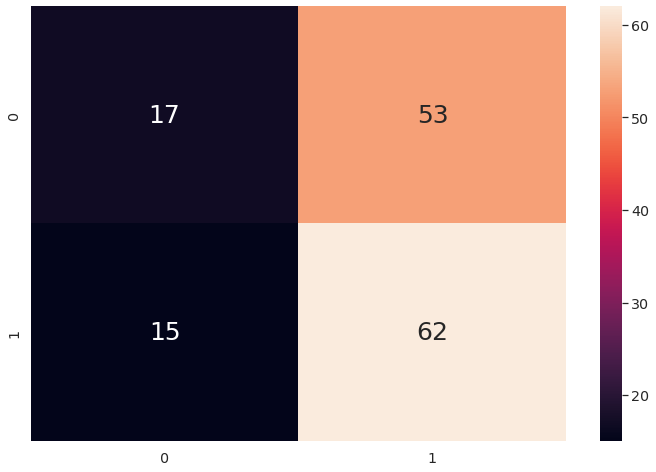

In [48]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm_gnb, range(2), range(2))
plt.figure(figsize=(12,8))
sn.set(font_scale=1.3) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 25}, fmt='g') # for num predict size

plt.show()

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,result_gnb, target_names=unique_category, digits=4))

              precision    recall  f1-score   support

    increase     0.5312    0.2429    0.3333        70
    decrease     0.5391    0.8052    0.6458        77

    accuracy                         0.5374       147
   macro avg     0.5352    0.5240    0.4896       147
weighted avg     0.5354    0.5374    0.4970       147

